In [1]:
#//////////////////////////////////////////////////////

# p5607 -- RUN1

#//////////////////////////////////////////////////////

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import h5py as h5

import projectionProcedure as proj
from corr_funcs import osc_beg_end, relChgPct, relChg, osc_amp, recovFitter, detrend

from bokeh.plotting import figure, show, save
from bokeh.io import output_notebook, output_file, reset_output
from bokeh.layouts import gridplot, row, column
from bokeh.models import Legend
output_notebook()

Loading BokehJS ...

Loading BokehJS ...

In [3]:
def read_hdf(fileName, opts=[]):
    # print(len(opts))
    data = pd.DataFrame()
    if len(opts) == 0:
        for chanName in h5.File(fileName, "r").keys():
            data[chanName] = h5.File(fileName, "r")[chanName]
    else:
        for chanName in opts:
            data[chanName] = h5.File(fileName, "r")[chanName]
    return data

In [4]:
def read_results(fileName, grp, opts=[]):
    # print(len(opts))
    data = pd.DataFrame()
    if len(opts) == 0:
        for chanName in h5.File(fileName, "r")[grp].keys():
            data[chanName] = h5.File(fileName, "r")[chanName]
    else:
        for chanName in opts:
            data[chanName] = h5.File(fileName, "r")[grp][chanName]
    return data

In [5]:
SAVE = 1
runname = 'p5607'
run = 'run1'

mechDat = read_hdf('../'+runname+'_r.hdf5', ['norm stress', 'time', 'perm'])

# Load Thickness
thDat = read_hdf('../'+runname+'_Thickness.hdf5', ['ThChangeLPF'])

T = 0; R = 0
tr0Dat = read_results('../Results_wAmp/'+runname+'_'+run+'_pp_wAmp_T'+str(T+1)+'R'+str(R+1)+'.hdf5', 'T='+str(T)+'_R='+str(R), ['c_s', 'idxAc'])
# [vel0,timeShift0,rmsAmp0,freqQAmp0,idxAc0] = list(map(lambda bb: np.load('../Results_wAmp/'+runname+'_'+run+'_pp_wAmp_T'+str(T+1)+'R'+str(R+1)+'.npz',allow_pickle=True)[bb], ['c_s','timeShift','rms','freqQAmp','idxAc']))

T = 1; R = 1
tr1Dat = read_results('../Results_wAmp/'+runname+'_'+run+'_pp_wAmp_T'+str(T+1)+'R'+str(R+1)+'.hdf5', 'T='+str(T)+'_R='+str(R), ['c_s', 'idxAc'])

T = 2; R = 2
tr2Dat = read_results('../Results_wAmp/'+runname+'_'+run+'_pp_wAmp_T'+str(T+1)+'R'+str(R+1)+'.hdf5', 'T='+str(T)+'_R='+str(R), ['c_s', 'idxAc'])

T = 3; R = 3
tr3Dat = read_results('../Results_wAmp/'+runname+'_'+run+'_pp_wAmp_T'+str(T+1)+'R'+str(R+1)+'.hdf5', 'T='+str(T)+'_R='+str(R), ['c_s', 'idxAc'])

T = 4; R = 4
tr4Dat = read_results('../Results_wAmp/'+runname+'_'+run+'_pp_wAmp_T'+str(T+1)+'R'+str(R+1)+'.hdf5', 'T='+str(T)+'_R='+str(R), ['c_s', 'idxAc'])

T = 5; R = 5
tr5Dat = read_results('../Results_wAmp/'+runname+'_'+run+'_pp_wAmp_T'+str(T+1)+'R'+str(R+1)+'.hdf5', 'T='+str(T)+'_R='+str(R), ['c_s', 'idxAc'])

T = 6; R = 6
tr6Dat = read_results('../Results_wAmp/'+runname+'_'+run+'_pp_wAmp_T'+str(T+1)+'R'+str(R+1)+'.hdf5', 'T='+str(T)+'_R='+str(R), ['c_s', 'idxAc'])

ns = mechDat['norm stress'][tr0Dat['idxAc']]
perm = mechDat['perm'][tr0Dat['idxAc']]

In [6]:
# mechDat['time'][tr0Dat['idxAc']]

In [7]:
vel0_detrend = detrend(mechDat['time'][tr0Dat['idxAc']].to_numpy(), tr0Dat['c_s'].to_numpy())
vel1_detrend = detrend(mechDat['time'][tr1Dat['idxAc']].to_numpy(), tr1Dat['c_s'].to_numpy())
vel2_detrend = detrend(mechDat['time'][tr2Dat['idxAc']].to_numpy(), tr2Dat['c_s'].to_numpy())
vel3_detrend = detrend(mechDat['time'][tr3Dat['idxAc']].to_numpy(), tr3Dat['c_s'].to_numpy())
vel4_detrend = detrend(mechDat['time'][tr4Dat['idxAc']].to_numpy(), tr4Dat['c_s'].to_numpy())
vel5_detrend = detrend(mechDat['time'][tr5Dat['idxAc']].to_numpy(), tr5Dat['c_s'].to_numpy())
vel6_detrend = detrend(mechDat['time'][tr6Dat['idxAc']].to_numpy(), tr6Dat['c_s'].to_numpy())

# rmsAmp0_detrend = detrend(Time[idxAc0], rmsAmp0)
# rmsAmp1_detrend = detrend(Time[idxAc1], rmsAmp1)
# rmsAmp2_detrend = detrend(Time[idxAc2], rmsAmp2)
# rmsAmp3_detrend = detrend(Time[idxAc3], rmsAmp3)
# rmsAmp4_detrend = detrend(Time[idxAc4], rmsAmp4)
# rmsAmp5_detrend = detrend(Time[idxAc5], rmsAmp5)
# rmsAmp6_detrend = detrend(Time[idxAc6], rmsAmp6)
# # perm_detrend = detrend(Time[idxAc2], perm)

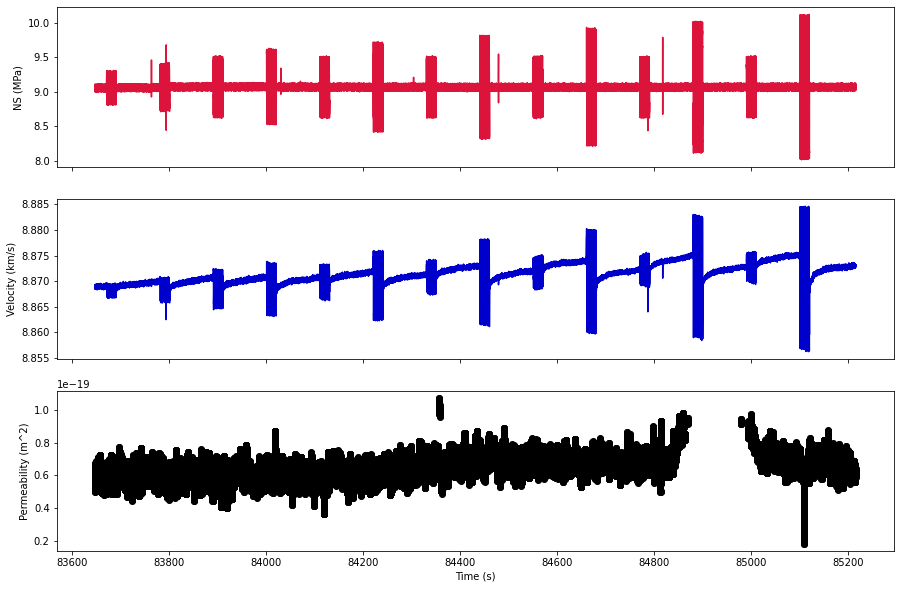

In [8]:
# %matplotlib widget
fig, axs = plt.subplots(3,1, figsize=(15,10), sharex=True)

# axs[0].plot(ppa, color='crimson')
axs[0].plot(mechDat['time'][tr3Dat['idxAc']], ns, color='crimson')
axs[0].set_ylabel('NS (MPa)')
axs[1].plot(mechDat['time'][tr3Dat['idxAc']], tr4Dat['c_s'], color='mediumblue')
axs[1].set_ylabel('Velocity (km/s)')
# axs[2].plot((mechDat['time'][tr0Dat['idxAc']], rmsAmp1, color='goldenrod')
# axs[2].set_ylabel('RMS amp')
axs[2].scatter(mechDat['time'][tr3Dat['idxAc']], perm, c='black') 
axs[2].set_ylabel('Permeability (m^2)')
axs[2].set_xlabel('Time (s)')

plt.show()

In [9]:
# fig31 = figure(title='T'+str(T+1)+' --> R'+str(R+1), tools='pan,box_zoom,undo,hover,crosshair') 
# fig31.line(Time[idxAc2], ppa, line_width=1.5, line_color="crimson")
# fig31.yaxis.axis_label = 'effNS (MPa)'

# fig32 = figure(x_range=fig31.x_range, tools='pan,box_zoom,undo,save,hover,crosshair')
# fig32.line(Time[idxAc2], vel2_detrend, line_width=1.5, line_color="mediumblue")
# fig32.line(Time[idxAc2], vel2, line_width=1.5, line_color="magenta")
# fig32.yaxis.axis_label = 'Velocity (km/s)'

# fig33 = figure(x_range=fig31.x_range, tools='pan,box_zoom,undo,save,hover,crosshair')
# fig33.line(Time[idxAc2], rmsAmp2, line_width=1.5, line_color="goldenrod")
# fig33.line(Time[idxAc2], rmsAmp2_detrend, line_width=1.5, line_color="magenta")
# fig33.yaxis.axis_label = 'RMS amp'

# fig34 = figure(x_range=fig31.x_range, tools='pan,box_zoom,undo,save,hover,crosshair', y_axis_type="log", y_range=(1e-19, 1e-16))
# fig34.circle(Time[idxAc2], perm,size=5, fill_color='black', line_color="black")
# fig34.yaxis.axis_label = 'Permeability (m^2)'
# fig34.xaxis.axis_label = 'Time (s)'

# fig3 = gridplot([fig31, fig32, fig33, fig34], ncols=1, plot_width=800, plot_height=250)
# show(fig3)

In [6]:
# 45200+138705 - idxAc[0]

startTime, endTime = osc_beg_end(186670-tr0Dat['idxAc'][0],14,1000)
before = startTime - (1 * 1000)
after = endTime + (1*1000)

Text(0.5, 0, 'Time (s)')

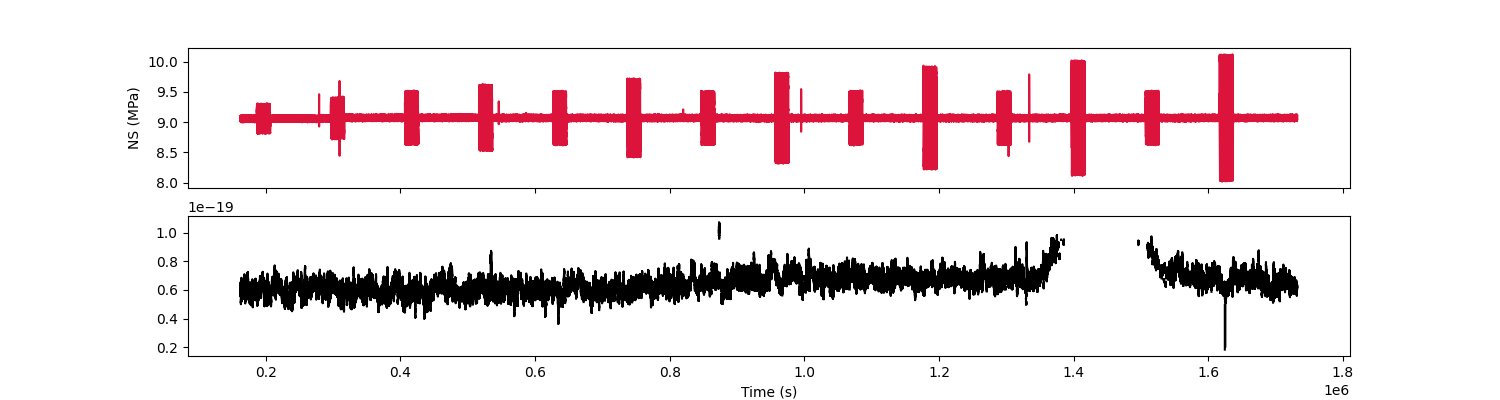

In [10]:
%matplotlib widget
fig, axs = plt.subplots(2,1, figsize=(15,4), sharex=True)
axs[0].plot(ns, color='crimson')
axs[1].plot(perm, color='k')
# axs.scatter(mechDat['time'][tr0Dat['idxAc']][startTime], ns[ns_start], color='k', s=35, zorder=1)
# axs.scatter(mechDat['time'][tr0Dat['idxAc']][startTime], ns[ns_end], color='k', s=35, zorder=1)
# axs.plot(mechDat['time'][tr0Dat['idxAc']], ns, color='crimson')
axs[0].set_ylabel('NS (MPa)')
axs[1].set_xlabel('Time (s)')

In [1]:
# sections = np.array([[45200,504200],[509300,859200],[863000,1136600],[1346000,1718200], [1727000,2166000],
# [2171400,2349700],[2372800,2561000],[2568000,2760800],[2836900,3019000]])

In [23]:
ns_start, ns_end = osc_beg_end(186670-tr0Dat['idxAc'][0], 14, 1000)

ns_amps = osc_amp(ns, ns_start, ns_end)

relPerm = relChgPct(perm, 2, 2, ns_start, ns_end, 1000)

#-----------------------------------------------------------------

# relVel = np.array([relChgPct(tr0Dat['c_s'], 1, 1, ns_start, ns_end, 1000), relChgPct(tr1Dat['c_s'], 1, 1, ns_start, ns_end, 1000), 
#                   relChgPct(tr2Dat['c_s'], 1, 1, ns_start, ns_end, 1000), relChgPct(tr3Dat['c_s'], 1, 1, ns_start, ns_end, 1000), 
#                   relChgPct(tr4Dat['c_s'], 1, 1, ns_start, ns_end, 1000), relChgPct(tr5Dat['c_s'], 1, 1, ns_start, ns_end, 1000), 
#                   relChgPct(tr6Dat['c_s'], 1, 1, ns_start, ns_end, 1000)])

relVel = np.array([relChgPct(vel0_detrend, 1, 1, ns_start, ns_end, 1000), relChgPct(vel1_detrend, 1, 1, ns_start, ns_end, 1000), 
                  relChgPct(vel2_detrend, 1, 1, ns_start, ns_end, 1000), relChgPct(vel3_detrend, 1, 1, ns_start, ns_end, 1000), 
                  relChgPct(vel4_detrend, 1, 1, ns_start, ns_end, 1000), relChgPct(vel5_detrend, 1, 1, ns_start, ns_end, 1000), 
                  relChgPct(vel6_detrend, 1, 1, ns_start, ns_end, 1000)])

# relRms = np.array([relChgPct(rmsAmp0_detrend, 1, 1, ns_start, ns_end), relChgPct(rmsAmp1_detrend, 1, 1, ns_start, ns_end), 
#                   relChgPct(rmsAmp2_detrend, 1, 1, ns_start, ns_end), relChgPct(rmsAmp3_detrend, 1, 1, ns_start, ns_end), 
#                   relChgPct(rmsAmp4_detrend, 1, 1, ns_start, ns_end), relChgPct(rmsAmp5_detrend, 1, 1, ns_start, ns_end), 
#                   relChgPct(rmsAmp6_detrend, 1, 1, ns_start, ns_end)])

/Users/clay/Documents/research/fracture-roughness/p5607/rel_chg_analysis/corr_funcs.py:52: RuntimeWarning: Mean of empty slice
  p0 = np.array(list(map(lambda x: np.nanmean(np.abs(param)[before[x]:pp_start[x]]), np.arange(np.size(pp_start)))))
/Users/clay/Documents/research/fracture-roughness/p5607/rel_chg_analysis/corr_funcs.py:53: RuntimeWarning: Mean of empty slice
  p1 = np.array(list(map(lambda x: np.nanmean(np.abs(param)[pp_end[x]:after[x]]), np.arange(np.size(pp_end)))))


In [24]:
fig1 = figure(tools='pan,box_zoom,undo,hover,crosshair') 
fig1.circle(ns_amps, relPerm, size=8, fill_color='black', line_color="black")
fig1.yaxis.axis_label = 'delk/k0 (%)'
colors = ['dodgerblue', 'mediumblue', 'navy', 'pink', 'deeppink', 'mediumvioletred', 'goldenrod']

fig2 = figure(x_range=fig1.x_range, tools='pan,box_zoom,undo,save,hover,crosshair')
fig2.add_layout(Legend(), 'right')
for aa in range(len(relVel)):
    fig2.circle(ns_amps, relVel[aa], size=8, fill_color=colors[aa], line_color=colors[aa], legend_label='T'+str(aa+1)+'R'+str(aa+1))
fig2.yaxis.axis_label = 'delc/c0 (%)'

fig2.xaxis.axis_label = 'NS osc. amp. (MPa)'
fig2.legend.click_policy="hide"

fig = gridplot([fig1, fig2], ncols=1, width=425, height=300)
show(fig)
# output_file("p5607_run1_prelim_delc_NS.html")
# save(fig)

In [ ]:
perm_recov = recovFitter(pp_start, pp_end, Time, perm, 'perm')

permRecov = perm_recov[1][:,0]
permRecov_r2 = perm_recov[1][:,2]

In [ ]:
vel_recov0 = recovFitter(pp_start, pp_end, Time, vel0_detrend, 'vel0')

In [ ]:
vel_recov1 = recovFitter(pp_start, pp_end, Time, vel1_detrend, 'vel1')

In [ ]:
vel_recov2 = recovFitter(pp_start, pp_end, Time, vel2_detrend, 'vel2')

In [ ]:
vel_recov3 = recovFitter(pp_start, pp_end, Time, vel3_detrend, 'vel3')

In [ ]:
vel_recov4 = recovFitter(pp_start, pp_end, Time, vel4_detrend, 'vel4')

In [ ]:
vel_recov5 = recovFitter(pp_start, pp_end, Time, vel5_detrend, 'vel5')

In [ ]:
vel_recov6 = recovFitter(pp_start, pp_end, Time, vel6_detrend, 'vel6')

In [ ]:
vel_recov = np.array([vel_recov0[1][:,0], vel_recov1[1][:,0], vel_recov2[1][:,0], 
            vel_recov3[1][:,0], vel_recov4[1][:,0], vel_recov5[1][:,0], 
            vel_recov6[1][:,0]])

vel_recov_r2 = np.array([vel_recov0[1][:,2], vel_recov1[1][:,2], vel_recov2[1][:,2], 
            vel_recov3[1][:,2], vel_recov4[1][:,2], vel_recov5[1][:,2], 
            vel_recov6[1][:,2]])

In [ ]:
rms_recov0 = recovFitter(pp_start, pp_end, Time, rmsAmp0_detrend, 'rms0')

In [ ]:
rms_recov1 = recovFitter(pp_start, pp_end, Time, rmsAmp1_detrend, 'rms1')

In [ ]:
rms_recov2 = recovFitter(pp_start, pp_end, Time, rmsAmp2_detrend, 'rms2')

In [ ]:
rms_recov3 = recovFitter(pp_start, pp_end, Time, rmsAmp3_detrend, 'rms3')

In [ ]:
rms_recov4 = recovFitter(pp_start, pp_end, Time, rmsAmp4_detrend, 'rms4')

In [ ]:
rms_recov5 = recovFitter(pp_start, pp_end, Time, rmsAmp5_detrend, 'rms5')

In [ ]:
rms_recov6 = recovFitter(pp_start, pp_end, Time, rmsAmp6_detrend, 'rms6')

In [ ]:
rms_recov = np.array([rms_recov0[1][:,0], rms_recov1[1][:,0], rms_recov2[1][:,0], 
            rms_recov3[1][:,0], rms_recov4[1][:,0], rms_recov5[1][:,0], 
            rms_recov6[1][:,0]])

rms_recov_r2 = np.array([rms_recov0[1][:,2], rms_recov1[1][:,2], rms_recov2[1][:,2], 
            rms_recov3[1][:,2], rms_recov4[1][:,2], rms_recov5[1][:,2], 
            rms_recov6[1][:,2]])

In [ ]:
# fig1 = figure(tools='pan,box_zoom,undo,hover,crosshair') 
# fig1.circle(pp_amps, perm_recov[1][:,0], size=8, fill_color='black', line_color="black")
# fig1.yaxis.axis_label = 'log perm recov'

# fig2 = figure(x_range=fig1.x_range, tools='pan,box_zoom,undo,save,hover,crosshair')
# fig2.circle(pp_amps, vel_recov2[1][:,0], size=8, fill_color='mediumblue', line_color="mediumblue", legend_label='T2R2')
# fig2.square(pp_amps, vel_recov4[1][:,0], size=8, fill_color='mediumblue', line_color="mediumblue", legend_label='T4R4')
# fig2.yaxis.axis_label = 'log vel recov'

# fig3 = figure(x_range=fig1.x_range, tools='pan,box_zoom,undo,save,hover,crosshair')
# fig3.circle(pp_amps, rms_recov2[1][:,0], size=8, fill_color='goldenrod', line_color="goldenrod", legend_label='T2R2')
# fig3.square(pp_amps, rms_recov4[1][:,0], size=8, fill_color='goldenrod', line_color="goldenrod", legend_label='T4R4')
# fig3.yaxis.axis_label = 'log vel recov'

# fig3.xaxis.axis_label = 'PP osc. amp. (MPa)'

# fig2.legend.click_policy="hide"
# fig3.legend.click_policy="hide"

# fig2 = gridplot([fig1, fig2, fig3], ncols=1, plot_width=350, plot_height=300)
# show(fig2)

In [ ]:
# filename = runname+'_'+run+'_summary_dat'
# np.savez_compressed(filename, pp_amps = pp_amps, relPerm=relPerm, relVel=relVel, relRms=relRms, 
#                     permRecov=permRecov, permRecov_r2 = permRecov_r2, 
#                     vel_recov=vel_recov, vel_recov_r2=vel_recov_r2, rms_recov=rms_recov, rms_recov_r2=rms_recov_r2)

In [ ]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1,1)
    
# ax.plot(Time[pp_start[0]:pp_end[0]], ppa[pp_start[0]:pp_end[0]], color = 'r') 
# ax.plot([Time[pp_start[0]+200], Time[pp_start[0]+200]], [1, 3], color = 'k',ls = '--') #Vertical Line
# ax.plot([Time[pp_end[0]-200], Time[pp_end[0]-200]], [1, 3], color = 'k',ls = '--') #Vertical Line

# plt.show()

In [ ]:
alphaC = np.zeros((7,len(pp_start)))
betaC = np.zeros((7,len(pp_start)))
deltaC = np.zeros((7,len(pp_start)))
R0c = np.zeros((7,len(pp_start)))
R1c = np.zeros((7,len(pp_start)))
R2c = np.zeros((7,len(pp_start)))

for bb, VEL in enumerate([vel0_detrend, vel1_detrend, vel2_detrend, vel3_detrend, vel4_detrend, vel5_detrend, vel6_detrend]):
    for aa in range(len(pp_start)):
        t = Time[pp_start[aa]+200:pp_end[aa]-200] 
        V_HF = relChg(VEL, 1, pp_start[aa], pp_end[aa], 100)
        strain = ppa[pp_start[aa]+200:pp_end[aa]-200] 
        Nharm = 2 
        fn = 1

        _,_,alphaC[bb, aa],betaC[bb, aa],deltaC[bb, aa],R0c[bb, aa],R1c[bb, aa],R2c[bb, aa] = proj.projectionProc(t, V_HF, strain, Nharm, fn)

In [ ]:
alphaA = np.zeros((7,len(pp_start)))
betaA = np.zeros((7,len(pp_start)))
deltaA = np.zeros((7,len(pp_start)))
R0a = np.zeros((7,len(pp_start)))
R1a = np.zeros((7,len(pp_start)))
R2a = np.zeros((7,len(pp_start)))

for bb, AMP in enumerate([rmsAmp0_detrend, rmsAmp1_detrend, rmsAmp2_detrend, rmsAmp3_detrend, rmsAmp4_detrend, rmsAmp5_detrend, rmsAmp6_detrend]):
    for aa in range(len(pp_start)):
        t = Time[pp_start[aa]+200:pp_end[aa]-200] 
        V_HF = relChg(AMP, 1, pp_start[aa], pp_end[aa], 100)
        strain = ppa[pp_start[aa]+200:pp_end[aa]-200] 
        Nharm = 2 
        fn = 1

        _,_,alphaA[bb, aa],betaA[bb, aa],deltaA[bb, aa],R0a[bb, aa],R1a[bb, aa],R2a[bb, aa] = proj.projectionProc(t, V_HF, strain, Nharm, fn)

In [ ]:
filename = 'summary_dat/'+runname+'_'+run+'_summary_dat.h5'
with h5py.File(filename, 'w') as f:
    mechGrp = f.create_group('mechGrp')
    mechGrp.create_dataset('pp_amps', data=pp_amps)

    permGrp = f.create_group('permGrp')
    permGrp.create_dataset('relPerm', data=relPerm)
    permGrp.create_dataset('permRecov', data=permRecov)
    permGrp.create_dataset('permRecov_r2', data=permRecov_r2)

    velGrp = f.create_group('velGrp')
    velGrp.create_dataset('relVel', data=relVel)
    velGrp.create_dataset('R0c', data=R0c)
    velGrp.create_dataset('R1c', data=R1c)
    velGrp.create_dataset('vel_recov', data=vel_recov)
    velGrp.create_dataset('vel_recov_r2', data=vel_recov_r2)
    
    ampGrp = f.create_group('ampGrp')
    ampGrp.create_dataset('relRms', data=relRms)
    ampGrp.create_dataset('R0a', data=R0a)
    ampGrp.create_dataset('R1a', data=R1a)
    ampGrp.create_dataset('rms_recov', data=rms_recov)
    ampGrp.create_dataset('rms_recov_r2', data=rms_recov_r2)